# Evaluación resultados cluster (10 de julio de 2020)

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statistics import mode
from src.models.Func_describir_clusters import presiones_df_heat, evaluacion_grupos_similaridad_presiones, evaluacion_grupos_presiones

In [4]:
os.chdir('..')

In [5]:
# Cargamos datos con los resultados del clustering
df_perfiles = pd.read_parquet('data/interim/perfiles_clusters.parquet')

## Estudio de los clusters

In [9]:
df_clusterh0 = df_perfiles.loc[df_perfiles['labels'] == 0, ]
df_clusterh1 = df_perfiles.loc[df_perfiles['labels'] == 1, ]
df_clusterh2 = df_perfiles.loc[df_perfiles['labels'] == 2, ]
df_clusterh3 = df_perfiles.loc[df_perfiles['labels'] == 3, ]
# Tamano clusters
df_perfiles.groupby('labels').size()


labels
0    131
1     80
2    233
3    223
dtype: int64

In [12]:
# Valores de las 4 variables en clusters
summary_groups = df_perfiles.groupby('labels').agg(
    {
        'altura': [min, max, 'mean', 'std'],
        'peso': [min, max, 'mean', 'std'],
        'sqr': [min, max, 'mean', 'std'],
        'sexo': [mode],
        'posicion': [mode, 'size']
    }
)
summary_groups

altura                               peso                               \
          min    max        mean       std   min    max       mean        std   
labels                                                                          
0       140.0  197.0  177.068702  8.205243  35.0  132.0  85.374046  15.607363   
1       145.0  182.0  165.675000  6.198765  42.0  102.0  66.750000  12.746307   
2       150.0  197.0  177.412017  6.874003  39.0  142.0  86.345494  14.788223   
3       140.0  178.0  163.623318  6.451607  40.0  113.0  66.237668  12.512769   

             sqr                                   sexo posicion       
             min      max       mean        std    mode     mode size  
labels                                                                 
0       0.132861  97.6852  34.744940  19.664004    Male   Supine  131  
1       0.323799  97.0198  36.315634  19.998565  Female   Supine   80  
2       0.039927  98.9901  34.105272  18.269023    Male  Lateral  233  
3       0.093528  83.7040  30.364044  16.312813  Female  Lateral  223

#### Mapas de calor

In [16]:
# Usamos la funcion presiones_df_heat para obtener mapas de calor para los clusters

# Df para los 4 clusters
list_result = []
list_count_result = []
for h in range(len(np.unique(df_perfiles['labels']))):
    df_clusterh = df_perfiles.loc[df_perfiles['labels'] == h]
    df_pres_h, df_pres_count_h, df_pres_prop_h = presiones_df_heat(df_clusterh)
    list_result.append(df_pres_prop_h)
    list_count_result.append(df_pres_count_h)


df_press_heat0 = list_result[0]
df_press_heat1 = list_result[1]
df_press_heat2 = list_result[2]
df_press_heat3 = list_result[3]


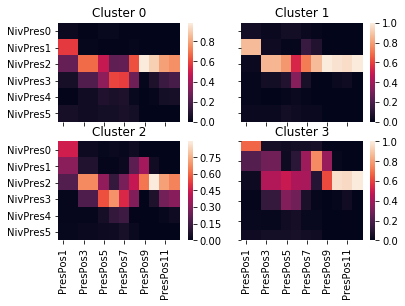

In [21]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
sns.heatmap(df_press_heat0, ax=axs[0, 0]).set_title('Cluster 0')
sns.heatmap(df_press_heat1, ax=axs[0, 1]).set_title('Cluster 1')
sns.heatmap(df_press_heat2, ax=axs[1, 0]).set_title('Cluster 2')
sns.heatmap(df_press_heat3, ax=axs[1, 1]).set_title('Cluster 3')
plt.show()

In [ ]:
# Mostramos el count de estos mapas de calor

In [29]:
# Cluster 0
df_press_count_heat0 = list_count_result[0]
df_press_count_heat0

,PresPos1,PresPos2,PresPos3,PresPos4,PresPos5,PresPos6,PresPos7,PresPos8,PresPos9,PresPos10,PresPos11,PresPos12
NivPres0,4,4,1,1,3,3,1,1,0,0,0,0
NivPres1,76,76,2,2,1,1,1,2,0,0,0,0
NivPres2,34,34,89,89,63,32,33,82,129,119,104,99
NivPres3,8,8,27,27,46,79,77,36,2,10,20,24
NivPres4,1,1,6,6,11,9,10,3,0,2,7,8
NivPres5,8,8,6,6,7,7,9,7,0,0,0,0


In [28]:
# Cluster 1
df_press_count_heat1 = list_count_result[1]
df_press_count_heat1

,PresPos1,PresPos2,PresPos3,PresPos4,PresPos5,PresPos6,PresPos7,PresPos8,PresPos9,PresPos10,PresPos11,PresPos12
NivPres0,4,4,2,2,4,4,2,1,0,0,0,0
NivPres1,70,70,3,3,1,1,12,7,0,0,0,0
NivPres2,2,2,69,69,63,43,58,70,80,78,77,80
NivPres3,1,1,4,4,7,27,5,0,0,2,3,0
NivPres4,1,1,0,0,1,2,1,0,0,0,0,0
NivPres5,2,2,2,2,4,3,2,2,0,0,0,0


In [27]:
# Cluster 2
df_press_count_heat2 = list_count_result[2]
df_press_count_heat2

,PresPos1,PresPos2,PresPos3,PresPos4,PresPos5,PresPos6,PresPos7,PresPos8,PresPos9,PresPos10,PresPos11,PresPos12
NivPres0,107,107,7,7,4,5,4,8,0,0,0,0
NivPres1,72,72,18,18,2,2,6,50,85,9,0,0
NivPres2,44,44,157,157,76,29,64,101,148,208,168,154
NivPres3,3,3,43,43,132,161,113,68,0,16,61,71
NivPres4,3,3,3,3,12,28,33,1,0,0,4,8
NivPres5,4,4,5,5,7,8,13,5,0,0,0,0


In [35]:
# Cluster 3
df_press_count_heat3 = list_count_result[3]
df_press_count_heat3

,PresPos1,PresPos2,PresPos3,PresPos4,PresPos5,PresPos6,PresPos7,PresPos8,PresPos9,PresPos10,PresPos11,PresPos12
NivPres0,151,151,13,13,10,12,12,14,0,0,0,0
NivPres1,49,49,65,65,7,25,87,169,85,4,0,0
NivPres2,7,7,98,98,110,95,93,22,138,216,212,223
NivPres3,2,2,31,31,74,64,15,3,0,3,10,0
NivPres4,5,5,4,4,10,13,5,5,0,0,1,0
NivPres5,9,9,12,12,12,14,11,10,0,0,0,0


## Evaluación clusters en presiones: similaridad media de las presiones de cada cluster

In [33]:
groups_presiones_similaridad=evaluacion_grupos_similaridad_presiones(df_perfiles)
groups_presiones_similaridad

{0: 0.133, 1: 0.074, 2: 0.141, 3: 0.148}

In [ ]:
## Estudio de presiones en cada cluster

In [34]:
porcentaje=0.04 # para mostrar únicamente aquellas categorías cuyo num de obs sea mayor que porcentaje*tamaño_cluster
summary_groups_presiones=evaluacion_grupos_presiones(df_perfiles,porcentaje)
summary_groups_presiones

{0:                     sqr                                    
                     min      max       mean        std size
 presiones                                                  
 112223322222  13.452500  97.6852  40.283452  20.161025   21
 112222322222   1.000320  76.6773  32.115521  18.562873   18
 222233332223   0.624949  75.1451  32.315025  17.482440   14
 112223222222   0.700759  76.3148  30.342472  22.827574   12
 112222222222   3.637050  72.9237  30.573985  20.266917   10
 112233222222   1.275590  70.4031  36.248486  22.067227    8
 223333332233  19.733900  97.6697  46.177163  24.311077    8,
 1:                    sqr                                    
                    min      max       mean        std size
 presiones                                                 
 112222222222  0.323799  73.0798  32.011217  18.734818   26
 112223222222  7.180330  73.5741  35.499470  17.458502   22
 112222122222  0.957338  71.5697  35.117344  22.755410   10,
 2:                   